If you have a windows and use firefox leave the variable windows = True
The same goes for wether you want to check the algorithm on a Tesla or Aygo

In [1]:
Windows = True 
M1 = False 
Tesla = True
Aygo = False 

### Find numberplate

Nummerpladen er: CM58 541



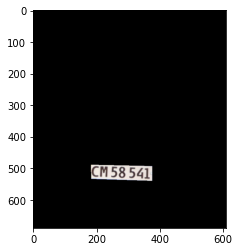

In [2]:
from modules import photohandling as ph

numberplate = ph.find_numberplate(M1, Aygo)

### Scrape web data from nummerplade.net

In [3]:
import modules.nummerplade_scraper as np_scraper
search_car = np_scraper.numberplate_scraper(numberplate, M1)

search_car_km = search_car.get_car_km()
search_car_make_model = search_car.get_car_make_model()
search_car_year = search_car.get_car_model_year()


print("Search_car_km: " + search_car_km)
print("Search_car_year: " + search_car_year)
print("Mærke/model på søgte bil: ", search_car_make_model)

search_car.close_browser()

Starting up..
Got Browser
Search Entered
Search done
Search_car_km: 93000
Search_car_year: 2015 
Mærke/model på søgte bil:  Toyota Aygo 


### Scrape web data from Bilbasen.dk

In [4]:
import modules.bilbasen_scraper as bilbasen_scraper

bilbasen = bilbasen_scraper.my_car(M1)
bilbasen.click_cookie_button()
bilbasen.click_leasing_button()
bilbasen.search_in_search_bar(search_car_make_model)
print("Searching for: " + search_car_make_model)
bilbasen.get_car_list()
bilbasen.close_browser()
make_me_dataframe = bilbasen.car_list


Starting up...
Got Browser
Cookie Button Clicked
Leasing Button Clicked
Search Bar Entered
Searching for: Toyota Aygo 
Souping Site

Cars found: 31
{'name': 'Toyota Aygo 1,0 VVT-i x-wave Sky 5d', 'km': 86000, 'price': '64800', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i x-pression 5d', 'km': 133000, 'price': '59900', 'year': 2016}
{'name': 'Toyota Aygo 1,0 VVT-i x-sky 5d', 'km': 53000, 'price': '74900', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i x-play 5d', 'km': 99000, 'price': '64900', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i x-touch 5d', 'km': 99000, 'price': '59800', 'year': 2014}
{'name': 'Toyota Aygo 1,0 VVT-i x-play 5d', 'km': 68000, 'price': '69900', 'year': 2016}
{'name': 'Toyota Aygo 1,0 VVT-i x-play Touch 5d', 'km': 89000, 'price': '73800', 'year': 2015}
{'name': 'Toyota Aygo 1,0 VVT-i x-clusiv 5d', 'km': 28000, 'price': '99900', 'year': 2019}
{'name': 'Toyota Aygo 1,0 VVT-i x-cite 5d', 'km': 40000, 'price': '79500', 'year': 2015}
{'name': 'Toyota Aygo 1,0 Plus 5d'

### Machine learning 

In [5]:

import modules.regression as regression
import pandas as pd

data = pd.DataFrame(make_me_dataframe) 
data.head()



,name,km,price,year
0,"Toyota Aygo 1,0 VVT-i x-wave Sky 5d",86000,64800,2015
1,"Toyota Aygo 1,0 VVT-i x-pression 5d",133000,59900,2016
2,"Toyota Aygo 1,0 VVT-i x-sky 5d",53000,74900,2015
3,"Toyota Aygo 1,0 VVT-i x-play 5d",99000,64900,2015
4,"Toyota Aygo 1,0 VVT-i x-touch 5d",99000,59800,2014


##### Create instance of the regression class

In [6]:
find_car = regression.find_car_value(
    data, search_car_km, search_car_year)

#### Validate that we get data from dataframe

In [7]:
find_car.show_dataframe()

,name,km,price,year
0,"Toyota Aygo 1,0 VVT-i x-wave Sky 5d",86000,64800,2015
1,"Toyota Aygo 1,0 VVT-i x-pression 5d",133000,59900,2016
2,"Toyota Aygo 1,0 VVT-i x-sky 5d",53000,74900,2015
3,"Toyota Aygo 1,0 VVT-i x-play 5d",99000,64900,2015
4,"Toyota Aygo 1,0 VVT-i x-touch 5d",99000,59800,2014


#### Normalizing the data 

In [8]:
scaled_df = find_car.normalize_data()

#### Data visualization with normalized data

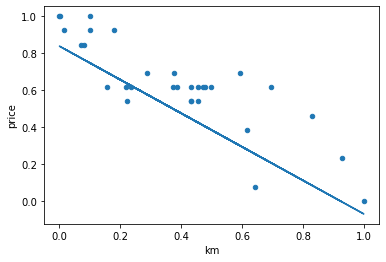

In [9]:
from matplotlib import pyplot as plt
import numpy as np

x1 = scaled_df['km']
y = scaled_df['price']

scaled_df.plot.scatter(x = 0, y = 1)
plt.xlabel("km")
plt.ylabel("price")

m, b = np.polyfit(x1, y, 1)
plt.plot(x1, m*x1+ b)


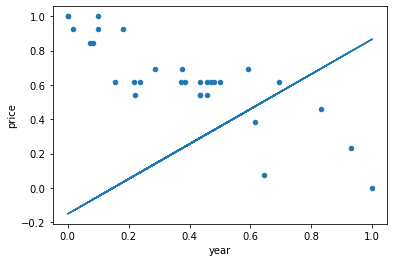

In [10]:
x2 = scaled_df['year']
y = scaled_df['price']

scaled_df.plot.scatter(x=0, y=1)
plt.xlabel("year")
plt.ylabel("price")

m, b = np.polyfit(x2, y, 1)
plt.plot(x1, m*x1+b)

#### Describing the data to get an idea of the values 

In [11]:
find_car.describe_data()


,km,year
count,31.000000,31.000000
mean,87661.290323,2015.225806
std,57043.145527,3.148647
min,6600.000000,2007.000000
25%,42500.000000,2014.000000
50%,89000.000000,2015.000000
75%,111000.000000,2017.000000
max,220000.000000,2020.000000


#### Trains the model using the data fetched 

In [12]:
find_car.train_model()


(        km  year
 2    53000  2015
 29  113000  2015
 13  109000  2015
 10   10000  2019
 27  138000  2012
 25  104000  2014
 22   99000  2014,
 2      74900
 29     64900
 13     69800
 10    109900
 27     39900
 25     46900
 22     59900
 Name: price, dtype: object)

#### Finding slope and interception | Used for data visualization

In [13]:
coeff_df, intercept = find_car.show_coff_and_interception()


Using the coeff and the interception given by the linear regression model to do the graph.
Then we combine the two coefficents and plot the data.

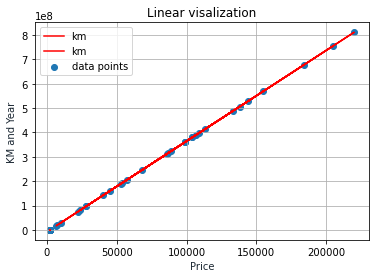

In [25]:
x, y = find_car.get_x_y()

km_coeff = int(coeff_df.iloc[0])
year_coeff = int(coeff_df.iloc[1])

#Combining the two slopes 
slope = (km_coeff) + (year_coeff)
y = slope*x+intercept

plt.plot(x, y, '-r', label='km')
plt.scatter(x,y, label="data points")
plt.title('Linear visalization')
plt.xlabel('Price', color='#1C2833')
plt.ylabel('KM and Year', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### Compare actual scraped values to the ones predicted by the model

In [15]:
find_car.prediction_vs_real()


,Actual,Predicted
2,74900,73886.767433
29,64900,63130.262085
13,69800,63847.362441
10,109900,96487.354843
27,39900,47479.565924
25,46900,61020.798243
22,59900,61917.173689


#### Shows the predicted value of the entered car

In [16]:
find_car.predict_car_value()

Predicted price of the entered car:  [66715.76386764]
